## Project: Finding Donors for CharityML

In [256]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipelinefrom 
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#load data
data=pd.read_csv('census.csv')
test=pd.read_csv('test_census.csv')
submission=pd.read_csv('example_submission.csv')

In [155]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# Exploring data

## number of records

In [101]:
n_records=data.shape[0]
print(n_records)

45222


##  find number of males and females

In [102]:
data['sex'].value_counts()

 Male      30527
 Female    14695
Name: sex, dtype: int64

## find records

- Number of individuals with income >$50,000

- Number of individuals with income <=$50,000

In [103]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

### Percentage of individuals with income > $50,000

In [104]:
data['income'].value_counts(normalize=True)*100

<=50K    75.215603
>50K     24.784397
Name: income, dtype: float64

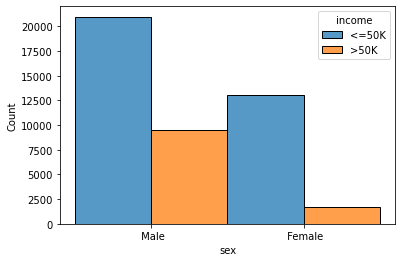

In [105]:
sns.histplot(data= data, x='sex', hue='income',multiple='dodge',binwidth=None)
plt.show()

# Preprocesssing

## investigate and find missing data


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [107]:
data.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## finding outliers

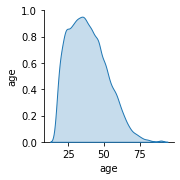

In [108]:
sns.pairplot(data=data, vars=[ "age"],kind='kde')
plt.show()

<AxesSubplot:xlabel='age'>

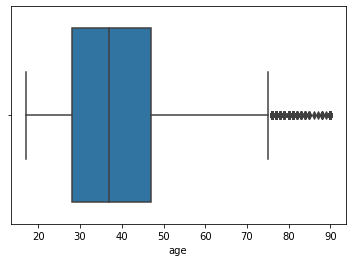

In [109]:
sns.boxplot(x=data['age'])

In [110]:
Q1=data['age'].quantile(0.25)
Q3=data['age'].quantile(0.75)
IQR=Q3-Q1

In [111]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [112]:
# outlires are below lower limi and above upper limit
data=data[data['age']<upper_limit ]

<AxesSubplot:xlabel='age'>

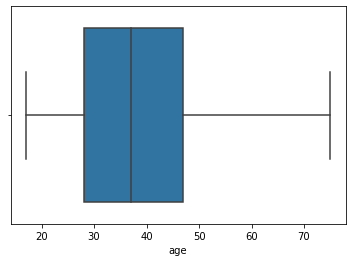

In [113]:
sns.boxplot(x=data['age'])

In [114]:
data.count()

age                44953
workclass          44953
education_level    44953
education-num      44953
marital-status     44953
occupation         44953
relationship       44953
race               44953
sex                44953
capital-gain       44953
capital-loss       44953
hours-per-week     44953
native-country     44953
income             44953
dtype: int64

In [115]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# feature selection

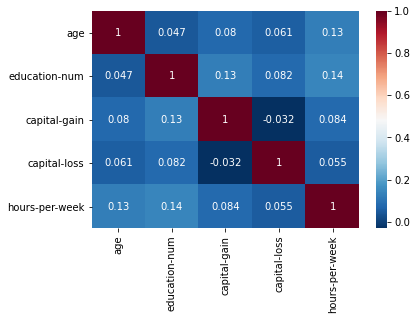

In [116]:
sns.heatmap(data.corr(), annot=True, cmap='RdBu_r')
plt.show()

In [117]:
data.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [118]:
datas=pd.get_dummies(data,columns=['sex','income'],drop_first=True)

In [124]:
datas.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,sex_ Male,income_>50K
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,2174.0,0.0,40.0,United-States,1,0


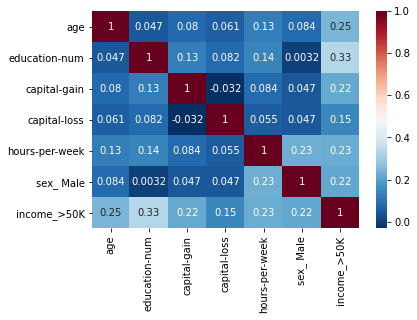

In [125]:
sns.heatmap(datas.corr(), annot=True, cmap='RdBu_r')
plt.show()

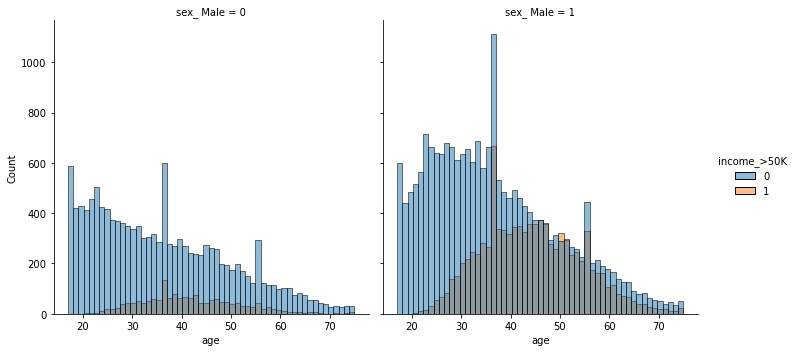

In [127]:
sns.displot(data=datas,x='age',hue='income_>50K',col='sex_ Male')

In [77]:
# so age is important

<AxesSubplot:xlabel='education-num', ylabel='Count'>

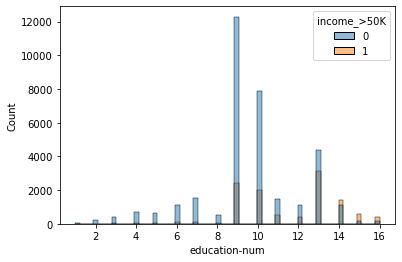

In [128]:
sns.histplot(data=datas,x='education-num',hue='income_>50K')

In [79]:
#so education num is important 

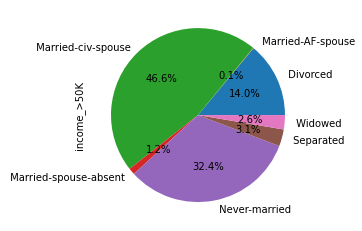

In [129]:
datas.groupby('marital-status')['income_>50K'].count().plot.pie(autopct="%.1f%%");
plt.show()

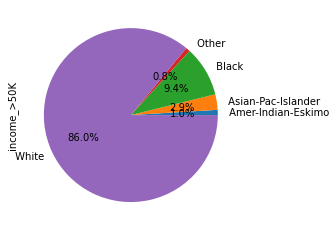

In [130]:
datas.groupby('race')['income_>50K'].count().plot.pie(autopct="%.1f%%");
plt.show()

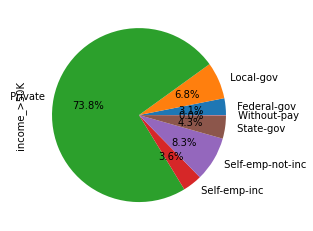

In [131]:
datas.groupby('workclass')['income_>50K'].count().plot.pie(autopct="%.1f%%");
plt.show()

In [132]:
datas.head(1)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,sex_ Male,income_>50K
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,2174.0,0.0,40.0,United-States,1,0


In [133]:
df=pd.get_dummies(data,columns=['workclass','marital-status','race','sex','income'],drop_first=True)


In [134]:
df.head(1)

,age,education_level,education-num,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,workclass_ Local-gov,...,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_>50K
0,39,Bachelors,13.0,Adm-clerical,Not-in-family,2174.0,0.0,40.0,United-States,0,...,0,1,0,0,0,0,0,1,1,0


In [135]:
df=df.drop(['education_level','education-num','occupation','relationship','capital-gain','hours-per-week','native-country'],axis=1)

In [138]:
df

,age,capital-loss,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_>50K
0,39,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
1,50,0.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
2,38,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,53,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,28,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
45218,39,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45219,38,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
45220,44,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
#age-capital loss  workclass- marital-status'-race'  sex - ///////////  may use country

In [140]:
def Scaling(data):
    return ((data-data.min())/(data.max()-data.min()))

In [406]:
y=df['income_>50K']
x=df.drop(['income_>50K'],axis=1)
X=Scaling(x)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)


In [407]:
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 33714 samples.
Testing set has 11239 samples.


In [408]:
print(X_train.shape)

print(y_train.shape)

print(X_test.shape)

print(y_test.shape)



(33714, 19)
(33714,)
(11239, 19)
(11239,)


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

# Naive Bayes

In [409]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()

In [410]:
#Training the model
model=GaussianNB()
model.fit(X_train,y_train)

# Making predictions
y_pred_train_Naive=model.predict(X_train)
y_pred_test_Naive=model.predict(X_test)

# Calculating accuracies
t_acc=accuracy_score(y_train,y_pred_train_Naive)
v_acc=accuracy_score(y_test,y_pred_test_Naive)

print('trainning acc={}'.format(t_acc))
print('validation acc={}'.format(v_acc))

trainning acc=0.6888532953669099
validation acc=0.6855592134531542


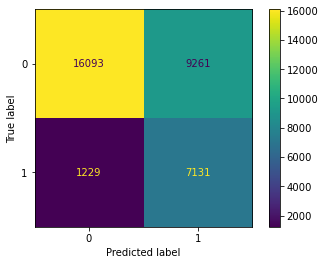

In [411]:
#train accuarcy
#Compute Confusion Matrix to evaluate the accuracy of a classification.
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred_train_Naive)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

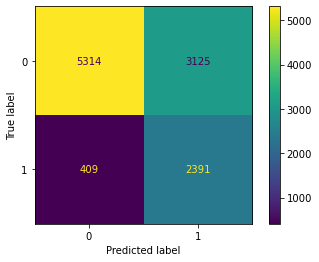

In [412]:
#validation accuracy
#Compute Confusion Matrix to evaluate the accuracy of a classification.
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test_Naive)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Decision tree

In [413]:
# Training the model
model = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 30,min_samples_split=20)
model.fit(X_train,y_train)

# Making predictions
y_pred_train_dtree=model.predict(X_train)
y_pred_test_dtree=model.predict(X_test)

# Calculating accuracies
t_acc=accuracy_score(y_train,y_pred_train_dtree)
v_acc=accuracy_score(y_test,y_pred_test_dtree)

print('trainning acc={}'.format(t_acc))
print('validation acc={}'.format(v_acc))


trainning acc=0.7990449071602301
validation acc=0.7867247975798558


# Random forest

In [437]:
# Training the model
model = RandomForestClassifier(n_estimators=17,max_depth=12,random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred_train_Rforest=model.predict(X_train)
y_pred_test_Rforest=model.predict(X_test)

# Calculating accuracies
t_acc=accuracy_score(y_train,y_pred_train_Rforest)
v_acc=accuracy_score(y_test,y_pred_test_Rforest)

print('trainning acc={}'.format(t_acc))
print('validation acc={}'.format(v_acc))

trainning acc=0.8036127424808684
validation acc=0.7877925082302696


# Adaboost

In [471]:
#Training the model 
model=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=8)
# n_estimators: number of our weak learners
# base_estimator: model used for weak learners
model.fit(X_train,y_train)

# Making predictions
y_pred_train_AdaBoost=model.predict(X_train)
y_pred_test_AdaBoost=model.predict(X_test)

# Calculating accuracies
t_acc=accuracy_score(y_train,y_pred_train_AdaBoost)
v_acc=accuracy_score(y_test,y_pred_test_AdaBoost)

print('trainning acc={}'.format(t_acc))
print('validation acc={}'.format(v_acc))

trainning acc=0.7841252891973661
validation acc=0.781920099652994


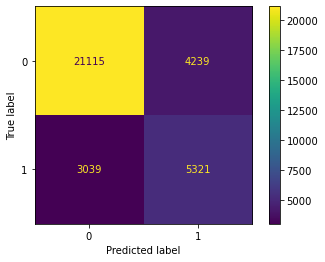

In [472]:
#Compute Confusion Matrix to evaluate the accuracy of a classification.
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred_train_AdaBoost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## KNN

In [473]:
#Training the model 
model=KNeighborsClassifier(n_neighbors=15)
# n_estimators: number of our weak learners
# base_estimator: model used for weak learners
model.fit(X_train,y_train)

# Making predictions
y_pred_train_knn=model.predict(X_train)
y_pred_test_knn=model.predict(X_test)

# Calculating accuracies
t_acc=accuracy_score(y_train,y_pred_train_knn)
v_acc=accuracy_score(y_test,y_pred_test_knn)

print('trainning acc={}'.format(t_acc))
print('validation acc={}'.format(v_acc))

trainning acc=0.7918075576911668
validation acc=0.7771154017261322


# SVC

In [257]:
#Training the model 
model =SVC(kernel='poly', degree=3, C=0.1)# SVC(kernel='rbf', gamma=10)#model = SVC(kernel='poly', degree=4, C=0.1)

# n_estimators: number of our weak learners
# base_estimator: model used for weak learners
model.fit(X_train,y_train)

# Making predictions
y_pred_train_svc=model.predict(X_train)
y_pred_test_svc=model.predict(X_test)

# Calculating accuracies
t_acc=accuracy_score(y_train,y_pred_train_svc)
v_acc=accuracy_score(y_test,y_pred_test_svc)

print('trainning acc={}'.format(t_acc))
print('validation acc={}'.format(v_acc))

trainning acc=0.7835913863676811
validation acc=0.7788949194768218


## SGD

In [502]:

#Training the model 
model=SGDClassifier(max_iter=10000, tol=1e-5)
# n_estimators: number of our weak learners
# base_estimator: model used for weak learners
model.fit(X_train,y_train)

# Making predictions
y_pred_train_SGD=model.predict(X_train)
y_pred_test_SGD=model.predict(X_test)

# Calculating accuracies
t_acc=accuracy_score(y_train,y_pred_train_SGD)
v_acc=accuracy_score(y_test,y_pred_test_SGD)

print('trainning acc={}'.format(t_acc))
print('validation acc={}'.format(v_acc))


trainning acc=0.7615234027407012
validation acc=0.7580745617937539


In [ ]:
# Logistic Regression

In [263]:
model =LogisticRegression()


# n_estimators: number of our weak learners
# base_estimator: model usLogisticRe/gressionfor weak learners
model.fit(X_train,y_train)

# Making predictions
y_pred_train_LR=model.predict(X_train)
y_pred_test_LR=model.predict(X_test)

# Calculating accuracies
t_acc=accuracy_score(y_train,y_pred_train_LR)
v_acc=accuracy_score(y_test,y_pred_test_LR)

print('trainning acc={}'.format(t_acc))
print('validation acc={}'.format(v_acc))

trainning acc=0.7721421367977694
validation acc=0.7683957647477534
